In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("ttrain.csv")

In [3]:
df2=pd.read_csv("ttest.csv")

### EDA

In [4]:
df1.shape

(891, 12)

In [5]:
df2.shape

(418, 11)

In [6]:
df1.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
430,431,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.0,0,0,110564,26.55,C52,S


In [7]:
df2.sample()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
210,1102,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.525,NaN,S


In [8]:
df=df1.append(df2)

C:\Users\mehme\AppData\Local\Temp\ipykernel_4540\2456558213.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df1.append(df2)


In [9]:
df.shape

(1309, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df["Fare"].mean(), df["Fare"].max(), df["Fare"].min(), df["Fare"].std(), df["Fare"].median()

(33.2954792813456, 512.3292, 0.0, 51.75866823917414, 14.4542)

In [14]:
df["Fare"]=df["Fare"].fillna(df["Fare"].mean())

In [15]:
import seaborn as sns

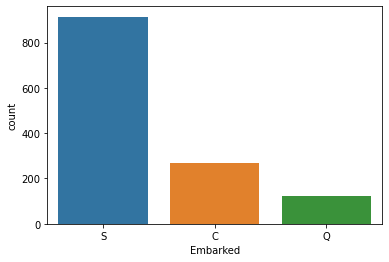

In [16]:
sns.countplot(x=df["Embarked"]);

In [17]:
df["Embarked"].mode()
#En çok tekrar eden değeri bulmak için kullanırız.

0    S
Name: Embarked, dtype: object

In [18]:
df["Embarked"].value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [19]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode)

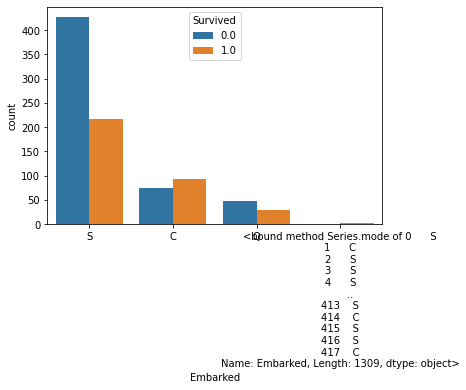

In [20]:
sns.countplot(x="Embarked",hue="Survived",data=df);

In [21]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [22]:
del df["Cabin"]
#Cabin Sütununu siliyoruz.

In [23]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [24]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
135,1027,NaN,3,"Carlsson, Mr. Carl Robert",male,24.0,0,0,350409,7.8542,S
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
156,157,1.0,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,Q
515,516,0.0,1,"Walker, Mr. William Anderson",male,47.0,0,0,36967,34.0208,S
843,844,0.0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,C
308,309,0.0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,C
90,982,NaN,3,"Dyker, Mrs. Adolf Fredrik (Anna Elisabeth Judi...",female,22.0,1,0,347072,13.9000,S
288,289,1.0,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,S
87,979,NaN,3,"Badman, Miss. Emily Louisa",female,18.0,0,0,A/4 31416,8.0500,S
358,359,1.0,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,Q


## Feature Engineering

In [25]:
df["Title"]=df["Name"].str.extract(" ([A-Za-z]+)\.",expand=False)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [27]:
del df["Name"]

In [28]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [29]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [30]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [31]:
df["Title"]=df["Title"].replace(["Ms","Mlle"],"Miss")
df["Title"]=df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Jonkheer","Don","Sir","Major","Dr","Capt","Col"],"Mr")

In [32]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [33]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [34]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [35]:
df[df["Age"]<18]["Age"].mean()

9.101753246753248

In [36]:
df["Age"]=df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

In [37]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [38]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [39]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr,1


In [40]:
df.drop(["PassengerId","Ticket"],axis=1, inplace=True)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,2
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,2
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,1
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,2
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,1


In [42]:
data=pd.get_dummies(df,drop_first=True)

In [43]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,1,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,0,1,0,1,0


In [44]:
train=data[:891]
test=data[891:]

In [45]:
y=train["Survived"]

In [46]:
x=train.drop("Survived",axis=1)

In [47]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [ ]:
def algo_test():
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
    g= GaussianNB()
    b= BernoulliNB()
    algos = [L,E,R,Lass,ETR,GBR,XGBC,g,b]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting',"GaussianNB", "BernoulliNB"]
    for i in range(10):
        i=i-1
        train=data[:891]
        test=data[891:]
        y=train["Survived"]
        x=train.drop("Survived",axis=1)
        algos[i].fit(x,y)
        del test["Survived"]
        tahmin1=algos[i].predict(test)
        sonuc=df2[["PassengerId"]]
        sonuc["Survived"]=tahmin1
        sonuc["Survived"]=sonuc["Survived"].astype("int64")
        sonuc.to_csv("{} tahmini.csv".format(algo_names[i]),index=False)

In [ ]:
algo_test()